# innominions #hackathon



# PUBG EDA Task 🏃‍♀️💨


PlayerUnknown's Battlegrounds
PUBG is a first/third-person shooter battle royale style game that matches over 90 players on a large island where teams and players fight to the death until one remains. Players are airdropped from an airplane onto the island where they are to scavenge towns and buildings for weapons, ammo, armor and first-aid. Players will then decide to either fight or hide with the ultimate goal of being the last one standing. A bluezone (see below) will appear a few minutes into the game to corral players closer and closer together by dealing damage to anyone that stands within the bluezone and sparing whoever is within the safe zone.

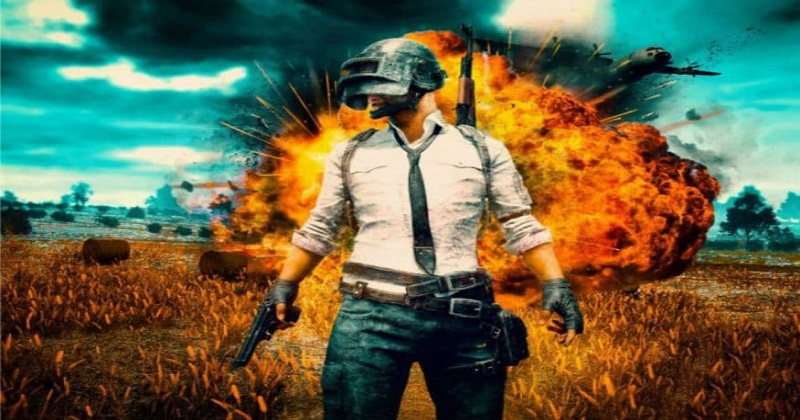

Lets name our players as "PLAYER UNKOWN" for our reference,

1. DBNOs - No. of opponents knocked by Player Unkown.
2. assists - No. of enemy players Player unkown damaged and were killed by teammates.
3. boosts - No. of Energy drinks, Painkillers used by Player Unkown(Boosts).
4. damageDealt - Total damage done by the Player Unkown in the games that he played.
5. headshotKills - Number of enemy players killed with headshots.
6. heals - No. of healing items like medkits, healthbags used for regeneration of the health.
7. Id - Player Unkown's Id(unique for every player).
8. killPlace - It defines the rank in the match depending on the kills done by player unkown.
9. killPoints - It defines that player unkown will be awardared 1 point for each kill.
10. killStreaks - To kill other players in short span of time in the game.
11. kills - Total no. of enimies executed by Player unknown.
12. longestKill - Longest distance between player unkown and player killed at time of death, But it may be misleading as knocking/killing a player and driving away or killing a player while being inside a vehicle may lead to a large longestKill distance statistics.
13. matchDuration - Total duration of match in seconds.
14. matchId - ID to identify a particular match. (makes easy to refer certain matches)
15. matchType - Helps us to identifying the game mode that was played. The available game modes available are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”, Extra gaming-modes are from certain events/custom matches played.
16. rankPoints - Ranking of the player unkown based on his/her game stats.
17. revives - Total no. of revives given to team-mates in each game played.
18. rideDistance - Total distance traveled using vehicles like Jeep,buggy,car,motorbike,boat measured in meters.
19. roadKills - No. of kills made while travellin in a vehicle.
20. swimDistance - Total distance covered in game by swimming measured in meters.
21. teamKills - Total kills made by the team.
22. vehicleDestroys - No. of vehicles destroyed in the match.
23. walkDistance - Total distance covered in game on foot measured in meters.
24. weaponsAcquired - No. of weapons that were picked up in match.
25. winPoints - This defines player having maximum points and has survived till the last will be the winner.
26. groupId - ID to identify a team within a match. If the same team of players plays in different matches, they will have a different groupId each time they play a match.
27. numGroups - Number of groups we have data for in the match.
28. maxPlace - Worst placement we have data for in the match.
29. winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.graphics.gofplots as sm
import plotly.express as px

In [48]:
df = pd.read_csv('pubg_data.csv')

In [49]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [50]:
df.head()  #checking head of the dataset.

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [51]:
df.tail() #checking tail of the dataset.

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [52]:
df.info() #checking the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [53]:
df.isna().sum() #checking for the missing values found one, in winPlacePerc we have a missing value.
#lets analyze why do we have a single missing value.

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [54]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [55]:
df.shape #This is a big dataset indeed.

(1111742, 30)

Description of Fetures :

In [56]:
# Check row with NaN value
df[df['winPlacePerc'].isna()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Here we have not much insight from this row it's an illegal match, seems like this was a match with only 1 player in the game so lets delete it.

In [57]:
df.shape #checking the shape before dropping NAN value.

(1111742, 30)

In [58]:
df.dropna(axis=0,inplace=True)

In [59]:
df.shape #since we have only 1 nan value we used this method and dropped that row as we can see the row has been dropped now we can proceed for further investigation.

(1111741, 30)

1. We removed the row containing the nan value because while taking a random sample the chances of that row getting picked diminishes.
2. Since the dataset is big we can cosider a sample out of this dataset for further analysis.

In [60]:
#defining a function to plot multiple graphs,

**Note : The data consiered is random so every time we run the program the values will change, The below observations were made and inferences made are mentioned above and below the cells.**

In [61]:
def Sample(df,n):
    
    df_1= sorted(np.random.permutation(len(df))[:n])
    return df.iloc[df_1.copy()]

In [62]:
df_new = Sample(df,50000) #we considered 50,000 random rows from the dataset.

In [63]:
df_new

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
13,950009,0bcc4efeade33f,ae841837835a89,4ae66868f61da3,0,0,100.00,1,0,0,...,0,0.0,0,0.0,0,0,94.70,2,0,0.0370
22,1861760,8ce910a270c624,01f3f60d62612c,69d619361cfc04,0,0,206.60,0,0,2,...,0,0.0,0,0.0,1,0,1067.00,6,1508,0.6383
40,2404821,873558b0e5aee4,b79d9bddd897d4,76ab56c957972f,0,0,66.78,0,0,0,...,0,0.0,0,0.0,0,0,10.13,0,1512,0.0000
71,4074815,6221339f55f068,2c2c64e5c8e6c3,9f0221d6cc41a2,0,4,0.00,1,0,1,...,1,7886.0,0,0.0,0,0,1942.00,4,0,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111651,2129587,d60434ad22b0cb,af0451d8a85dd7,4727f3f20c8f33,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,15.80,0,0,0.0357
1111661,3743782,5a0761a9f5eb0b,8fc18d3ae27c68,f9a7ee7b988ea3,1,3,232.70,1,0,1,...,0,0.0,0,0.0,0,0,1488.00,5,0,0.5106
1111670,1017690,fadad22721b554,9c86b39aa5f124,f4a250ed8c19d2,0,0,0.00,0,0,0,...,0,510.2,0,0.0,0,0,1082.00,4,0,0.4130
1111671,3739710,1fadecc2ca9ca3,71403fa37bf5bd,ed1cb2d7c49c22,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,80.28,2,1523,0.1957


Removing unnecessary columns as we dont require them in EDA.

In [64]:
del df_new['Unnamed: 0']
del df_new['Id']
del df_new['groupId']

In [65]:
df_new

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5,b146588581df18,0,0,0.00,0,0,0,59,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
13,4ae66868f61da3,0,0,100.00,1,0,0,88,0,0,...,0,0.0,0,0.0,0,0,94.70,2,0,0.0370
22,69d619361cfc04,0,0,206.60,0,0,2,17,1146,2,...,0,0.0,0,0.0,1,0,1067.00,6,1508,0.6383
40,76ab56c957972f,0,0,66.78,0,0,0,95,1396,0,...,0,0.0,0,0.0,0,0,10.13,0,1512,0.0000
71,9f0221d6cc41a2,0,4,0.00,1,0,1,47,0,0,...,1,7886.0,0,0.0,0,0,1942.00,4,0,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111651,4727f3f20c8f33,0,0,0.00,0,0,0,84,0,0,...,0,0.0,0,0.0,0,0,15.80,0,0,0.0357
1111661,f9a7ee7b988ea3,1,3,232.70,1,0,1,61,0,0,...,0,0.0,0,0.0,0,0,1488.00,5,0,0.5106
1111670,f4a250ed8c19d2,0,0,0.00,0,0,0,61,0,0,...,0,510.2,0,0.0,0,0,1082.00,4,0,0.4130
1111671,ed1cb2d7c49c22,0,0,0.00,0,0,0,79,1213,0,...,0,0.0,0,0.0,0,0,80.28,2,1523,0.1957


#  UNIVARIET ANALYSIS :

In [66]:
def plots(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    sm.ProbPlot(feature).qqplot(line = 's')

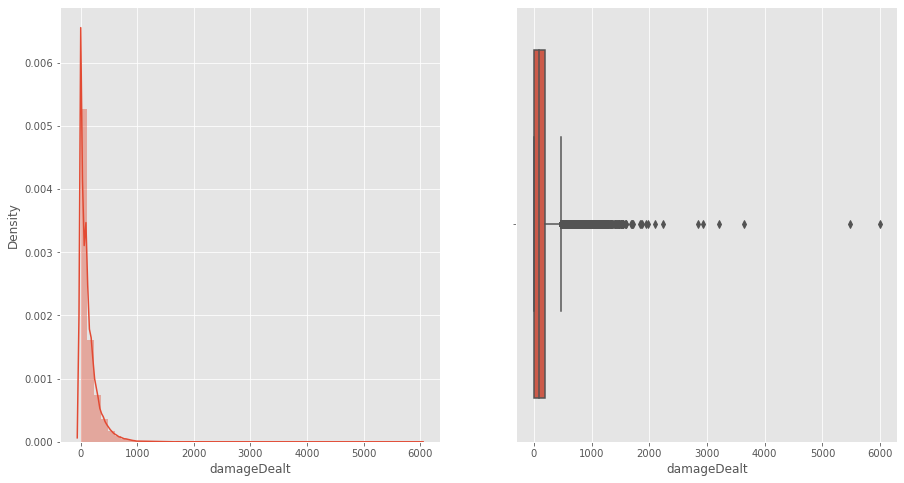

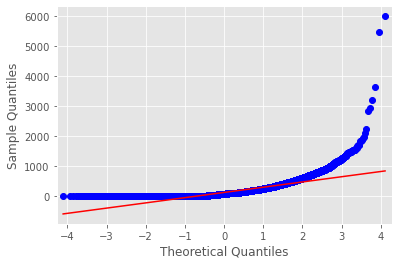

In [67]:
plots(df_new['damageDealt'])

Here we can see that the damage dealt is widely distributed as there are many players who deal damage less than 1000 who may be new to game or maybe bots, rest pro players are having avg damage above 500.

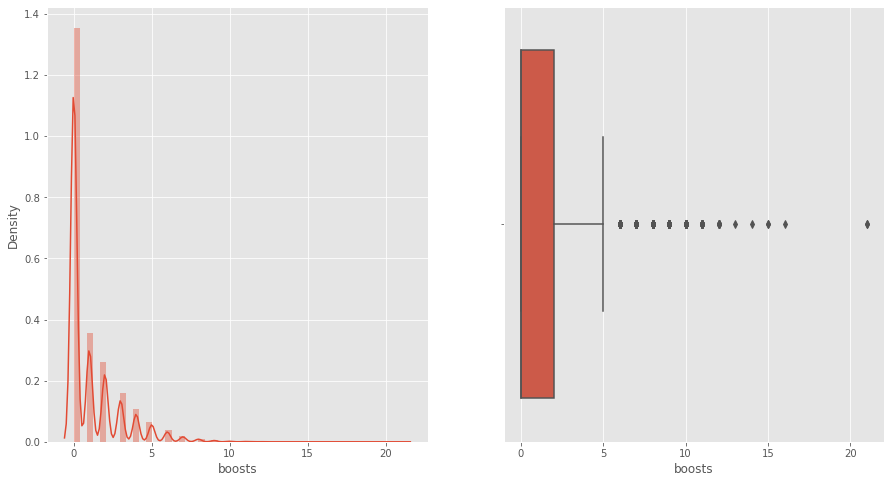

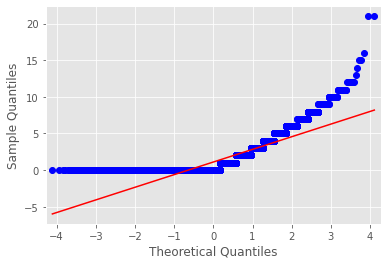

In [68]:
plots(df_new['boosts'])

Here we can see only a few players are using boosting items while playing a match.

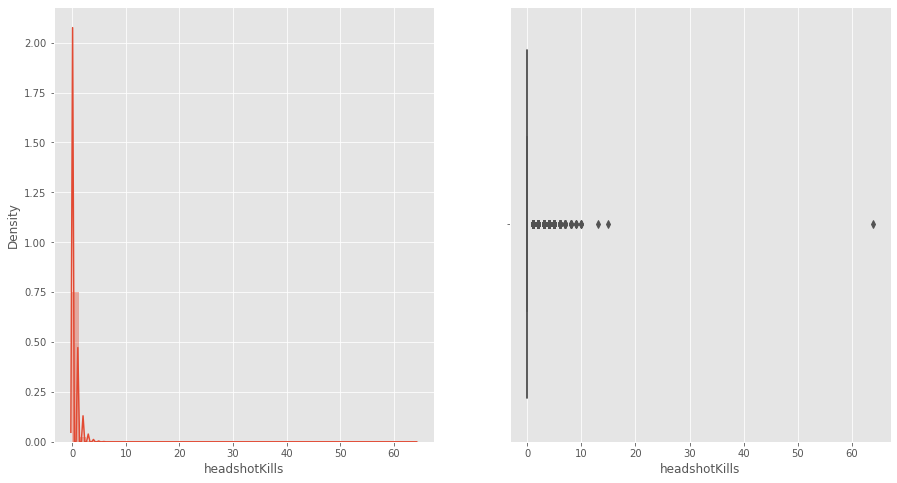

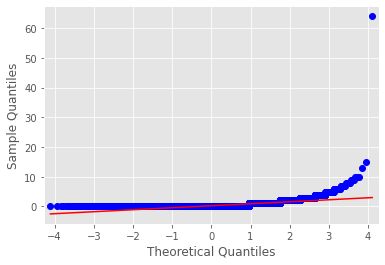

In [69]:
plots(df_new['headshotKills'])

Here we see that majority of the kills in a match are not headshots max headshots count is only 4, so many players are actually knocking enimies by shooting at torso legs etc.

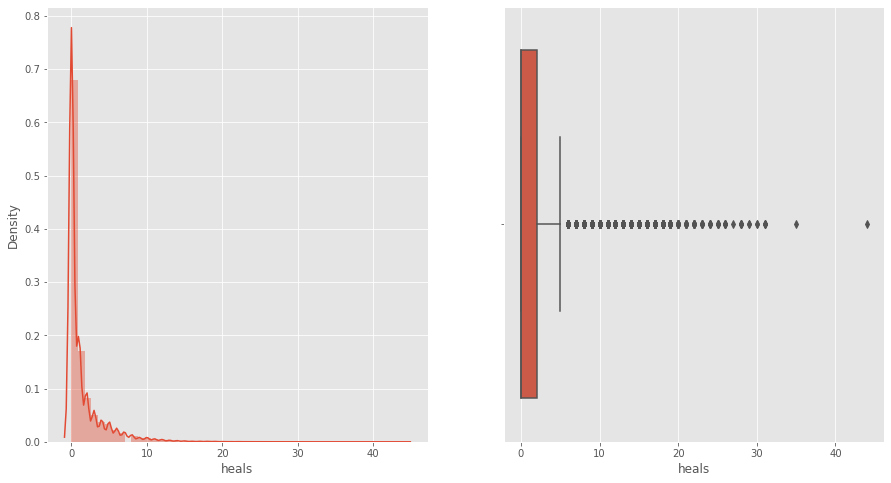

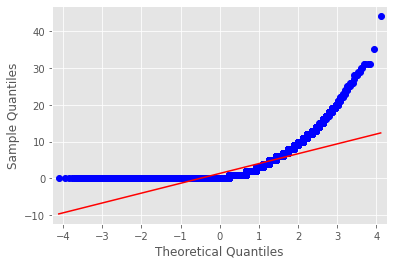

In [70]:
plots(df_new['heals'])

Here we can see that healing items used on average are upto 10 which is medkits,health kits etc but there are people who's consumption is more than average than the other players.

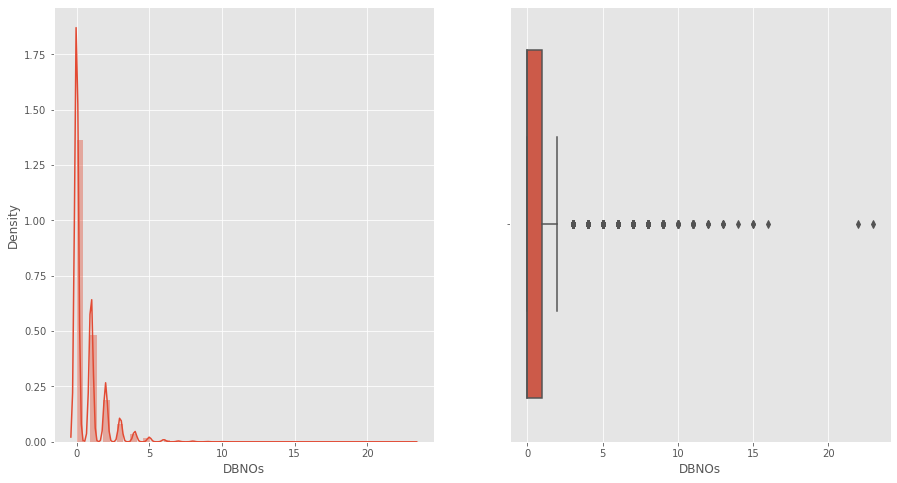

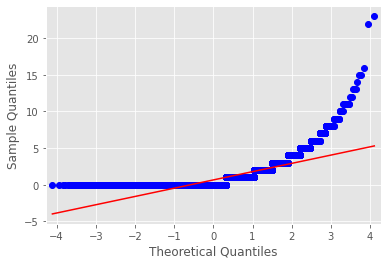

In [71]:
plots(df_new['DBNOs'])

Here we can see that on an average many players are able to knock down upto 5 players in a match, but there are some people who are knocking more than 5 players.

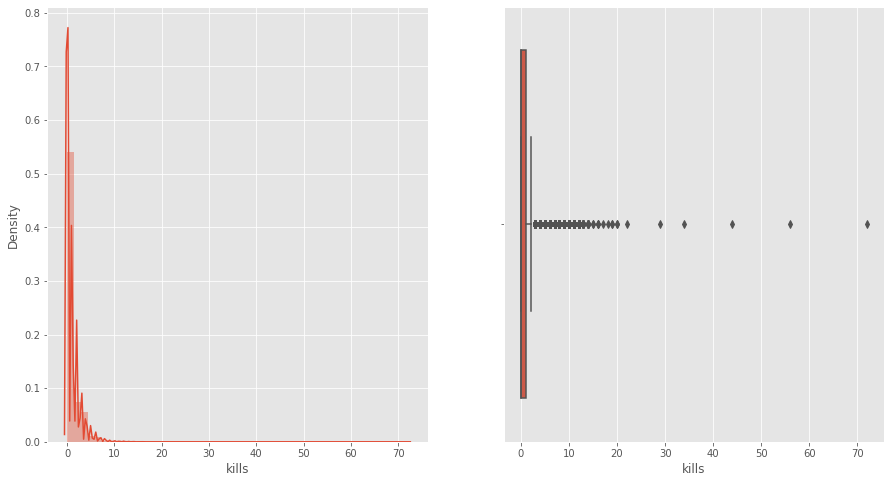

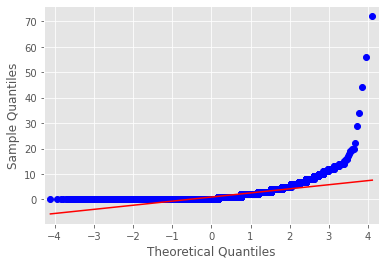

In [72]:
plots(df_new['kills'])

Here we see that on avg a single player by playing multiple modes is able to kill atleast 5-7 players on avg. But there are people who are having stats which are really good for an avg/pro player. Seems little fishy... Might be hackers..! on avg they are having almost 35 kills per match!

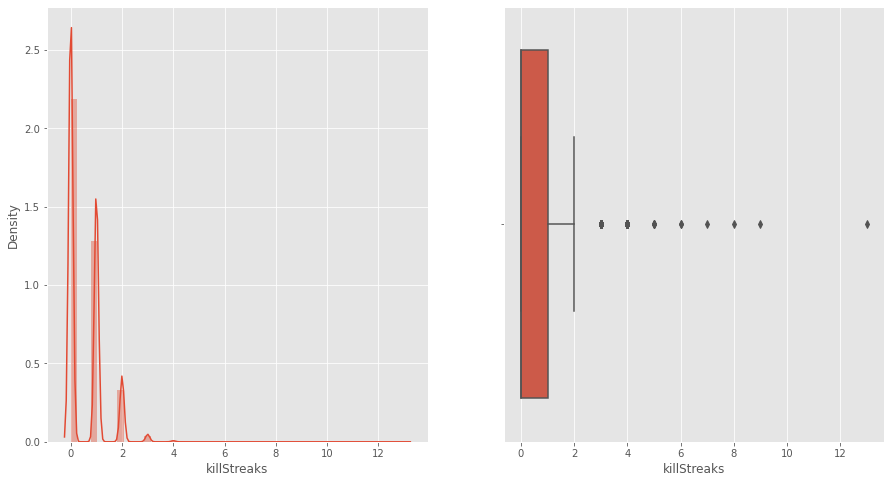

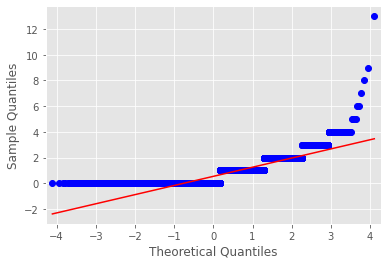

In [73]:
plots(df_new['killStreaks'])

Most of the streaks that are made by players are upto 3 kills on avg, but we have other players having streaks of upto 8 or more.

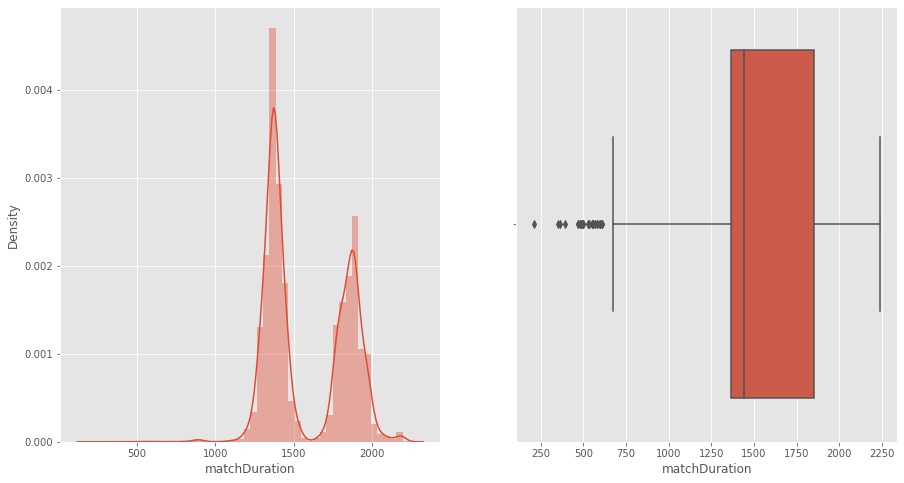

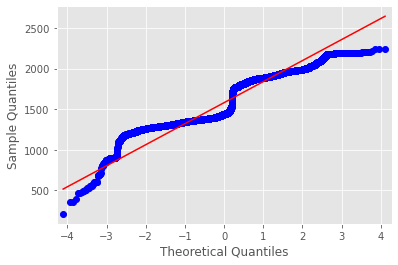

In [74]:
plots(df_new['matchDuration'])

On average the duration for each match lasts inbetween 1250-1500 seconds which is 20-25mins, and we have matches which have a higher duration of upto 1750-2250 which is 30-37 mins depending on the modes players have played.

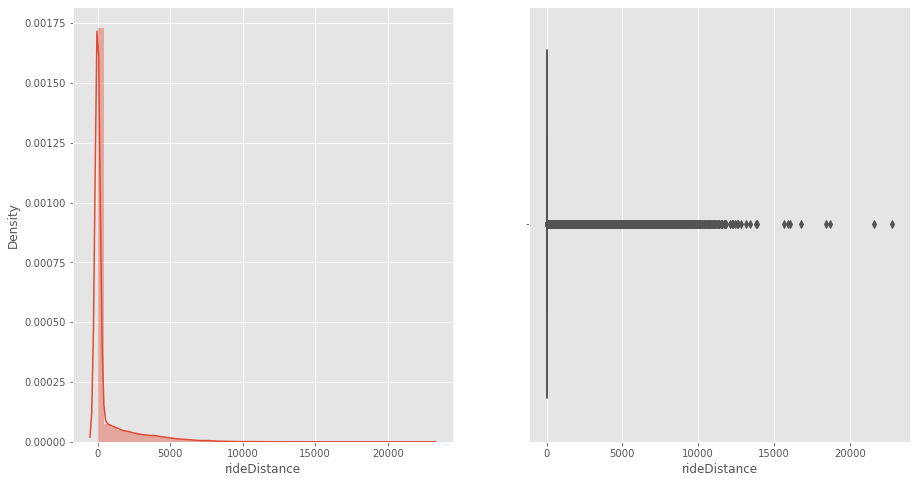

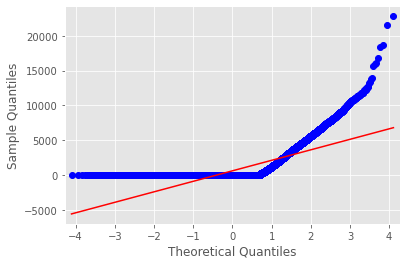

In [75]:
plots(df_new['rideDistance'])

Here we can see that on an average players travelling in vehicles is around 0-5000 meters, But there are some players who have travelled more upto 25000 meters.

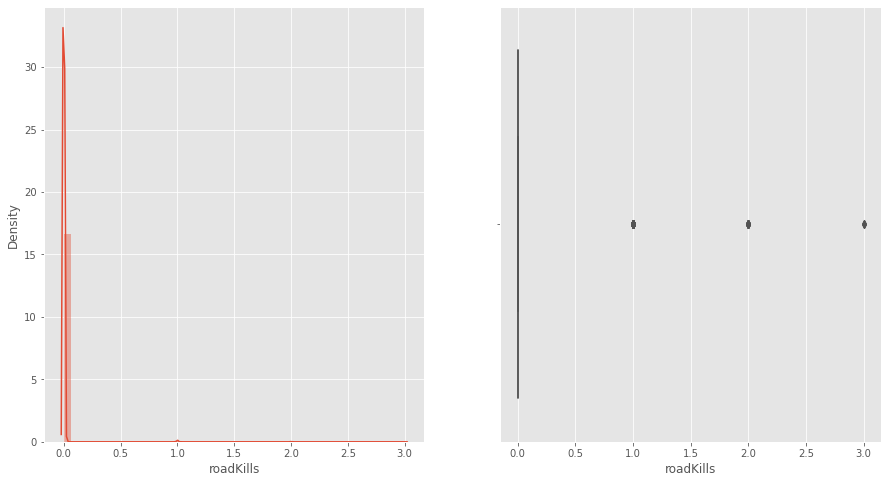

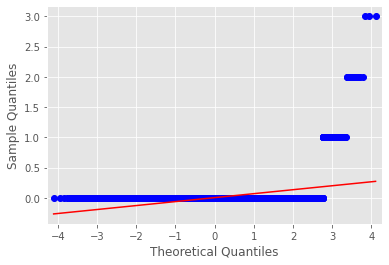

In [76]:
plots(df_new['roadKills'])

Here we can see that kills which were made by smashing enimies with vehicles is pretty rare, Only a few players have actully were able to kill enimies with vehicles which is Roadkills.

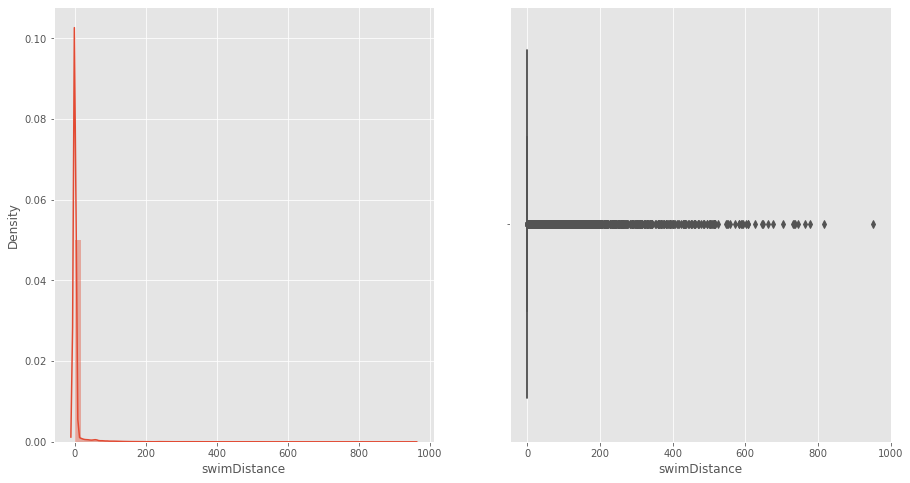

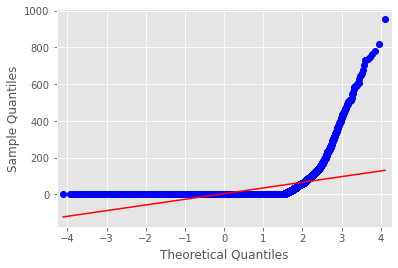

In [77]:
plots(df_new['swimDistance'])

1. Here on average most players have not tried to swim while playing in game but for some reasons we can see that some players have actually covered upto 1000meters while swimming.
2. May be due to the weird flight path or zone formation might have affected the players to choose swimming.

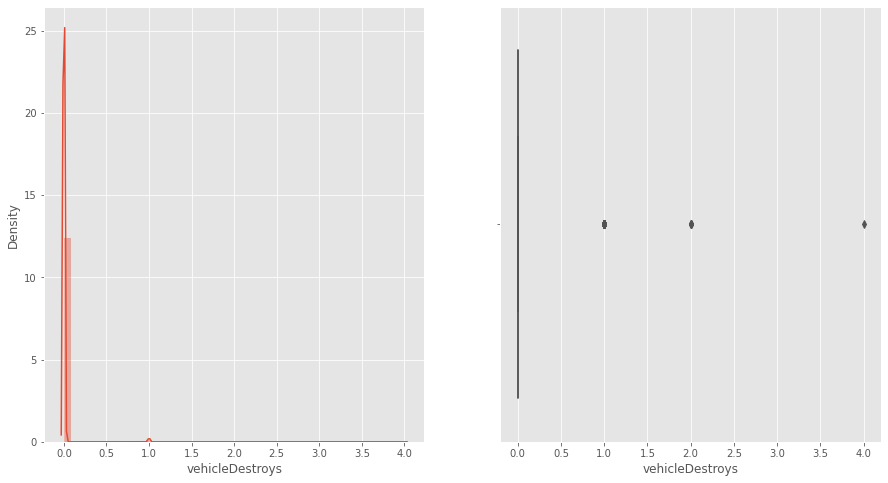

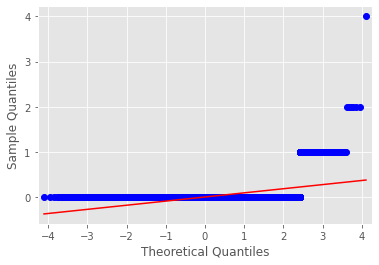

In [78]:
plots(df_new['vehicleDestroys'])

1. Here we can see that most players are concerned only about killing enimies and use vehicles for travelling instead of destroying them.
2. There are few players who have destroyed upto 2 vehicles in each game they have played on avg.

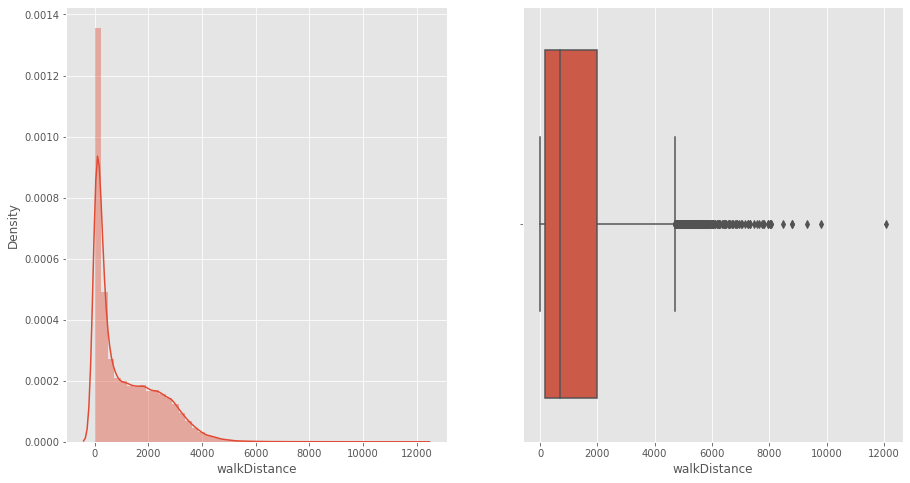

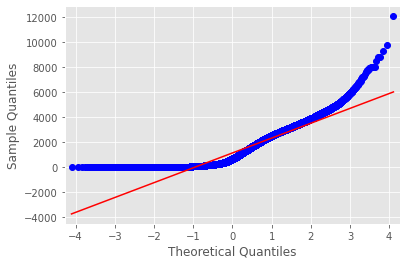

In [79]:
plots(df_new['walkDistance'])

1. On average players in each match have travelled as far as upto 4000 meters on foot.
2.There are few players who have covered upto 10000 meters on avg in aeach match on foot.

# BI - Variate analysis.

1. ****All the players who play PUBG are more concerned to win a Game so lets do analysis as keeping the win percentage as a target.****
2. Here we will try to see in which mode players are performing good and winning more no. of matches.

Since the final motive behind playing game is to win,
1. here we can see that players who have won most games preffered Boosts rather than healing items which means it could be an important parameter behind winning.
2. Here we can see that players though using more no.of healing items the winning percentage is less.

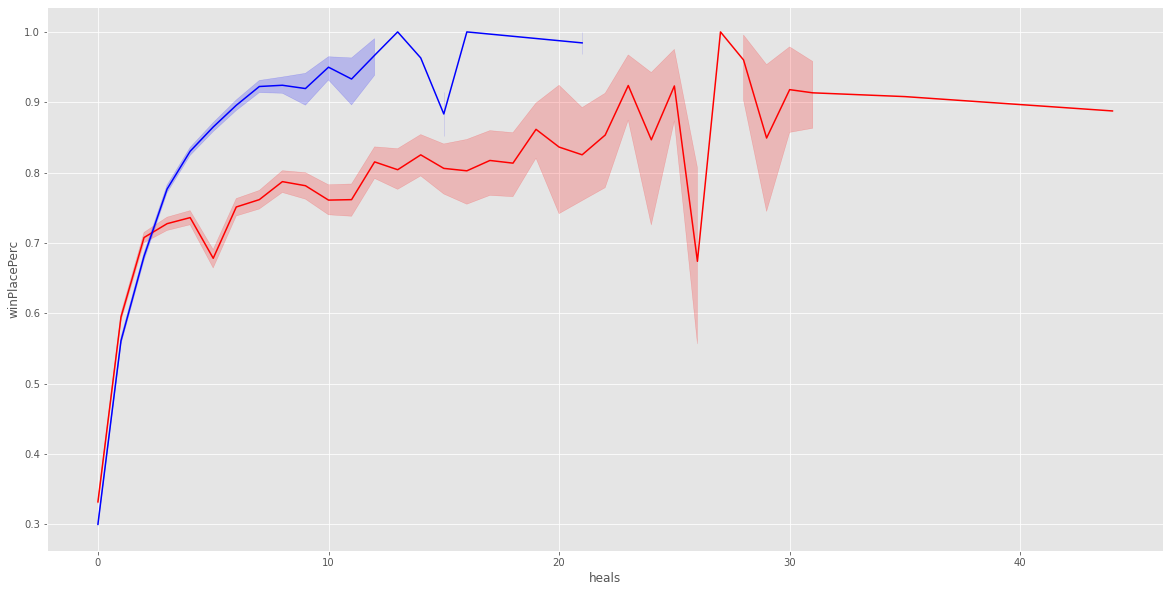

In [80]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='heals',y='winPlacePerc',data=df_new,color='red')
sns.lineplot(x='boosts',y='winPlacePerc',data=df_new,color='blue')
plt.show()

There are 100 players joining in each game so, there are 3 modes in which a player can wish to play they are :
1. solo_mode = Here a player is against 99 other players joining the match.
2. duo_mode = Here the player teams up with another player so the team size is 2, so out of 100 players we will have 50 teams in total.
3. squad_mode = Here the player teams up with 3 other players in the server to form a squad, team size is 4 and we will have 25 teams in total. 

In [81]:
solo_mode = df_new[df_new['numGroups']>50]
duo_mode = df_new[(df_new['numGroups']>25) & (df_new['numGroups']<=50)]
squad_mode = df_new[df_new['numGroups']<=25]

In [82]:
print('The no games played in solo mode are :',len(solo_mode))
print('The no games played in duo mode are :',len(duo_mode))
print('The no games played in squad mode are :',len(squad_mode))

The no games played in solo mode are : 7877
The no games played in duo mode are : 37125
The no games played in squad mode are : 4998


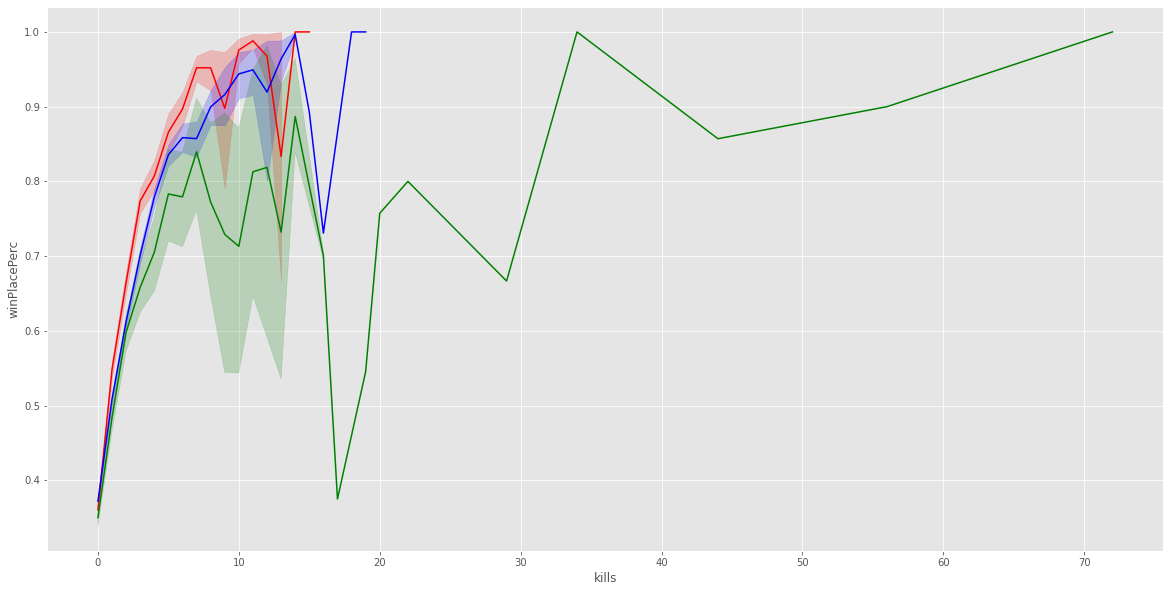

In [83]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='kills',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='kills',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='kills',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

1. Most wins were achived when a players played in Duo mode but with avg kill counts.
2. If a player is playing solo its difficult to find other players opting the same mode so there might be more no. of bots to make the server of 100 players, so we see better performance over other modes.
3. While playing in squad mode the players have good recored of getting more kills and have fair chances of winning the game given that all the players of the team are surviving till the end, Most games played is Squad mode.


1. Lets see which mode of the game play had highest amount of knockouts, in solo mode there is no knockout here the player dies instantly.
2. In duo if the player gets knocked out his other team member can revive him within certain interval of time, post which he cannot revive his teammate.
3. In squad also if a player gets knocked his other team members can revive him and he can play but if they fail to do so then the player dies.

<AxesSubplot:xlabel='DBNOs', ylabel='winPlacePerc'>

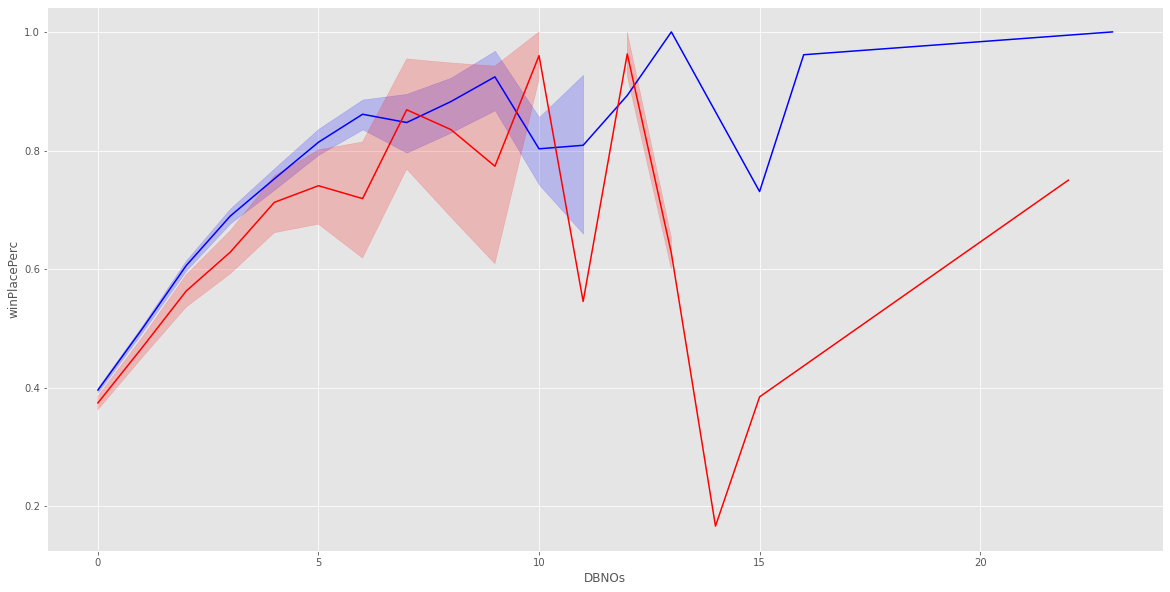

In [84]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='DBNOs',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='DBNOs',y='winPlacePerc',data=squad_mode,color='red')

Here we can see that most no. of knockouts were in Squad mode, which means squadmode games were usually more aggressive as compared to Duo mode.

1. Lets compare in which mode actually team members were able to give a sucessful revival to their teammate.
2. In solo mode as specified earlier there is no knockout the player dies instantly if he recives damage so we rule out the solo mode and check the other two modes.

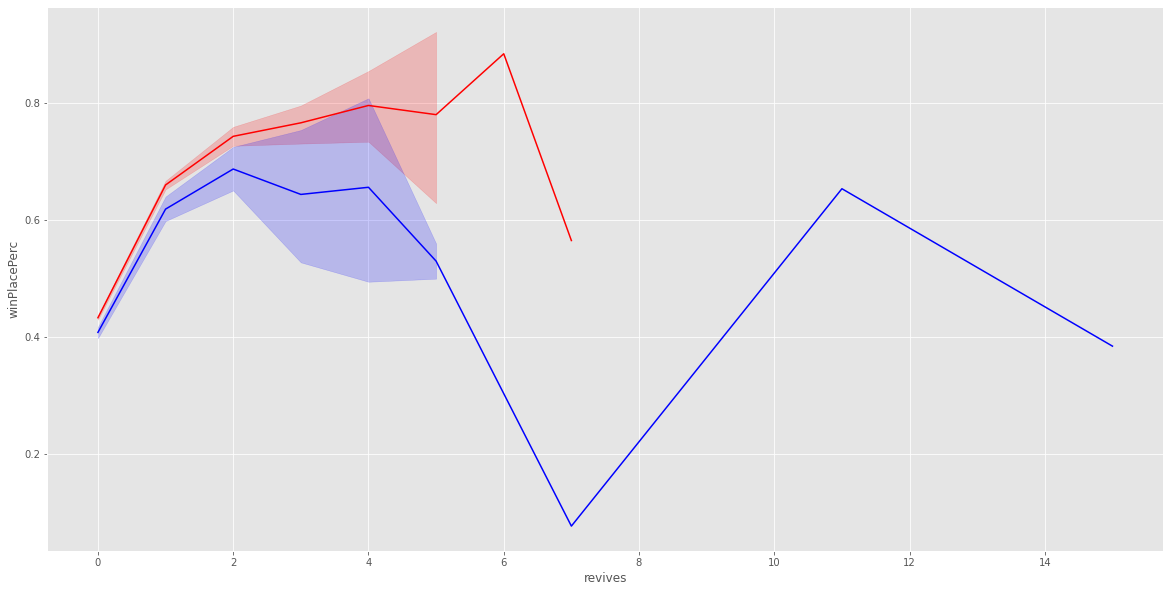

In [85]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='revives',y='winPlacePerc',data=duo_mode,color='red')
sns.lineplot(x='revives',y='winPlacePerc',data=squad_mode,color='blue')
plt.show()

Here we can see that more no. of revives were given in duo mode, it is more because there are only 2 players in either side of the team so if a player gets knocked out his teammate will have some time to revive him but in squad mode there will be 4 players and due to more aggression in squad mode the chances of sucessful revival is pretty low because any player can kill the knocked player in proper terms we can call it a Third party guy who is not belonging to either of the team can also kill the player who is knocked out.

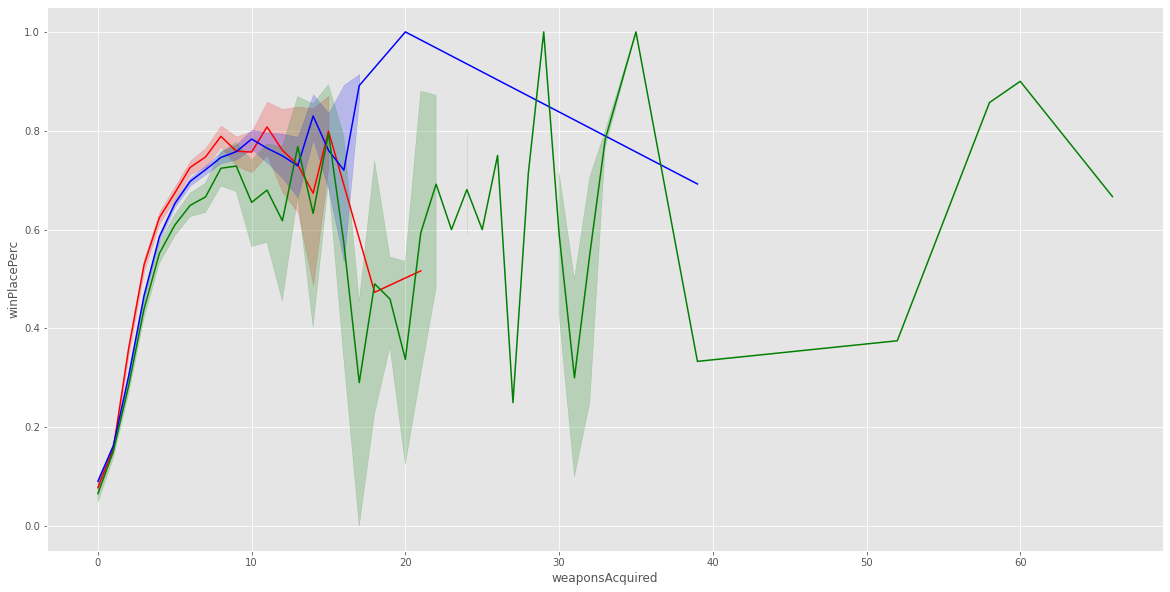

In [86]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

1. Here we can see that in duo mode if the players change weapons frequently then they tend to loose more matches.
2. Players who are playing solo mode if they tend to choose variety of different weapons they also tend to perform bad but good as compared with duo mode.
3. Players playing in squads who are using different weapons are actually performing better as compared to other two modes and tend to win more matches. 

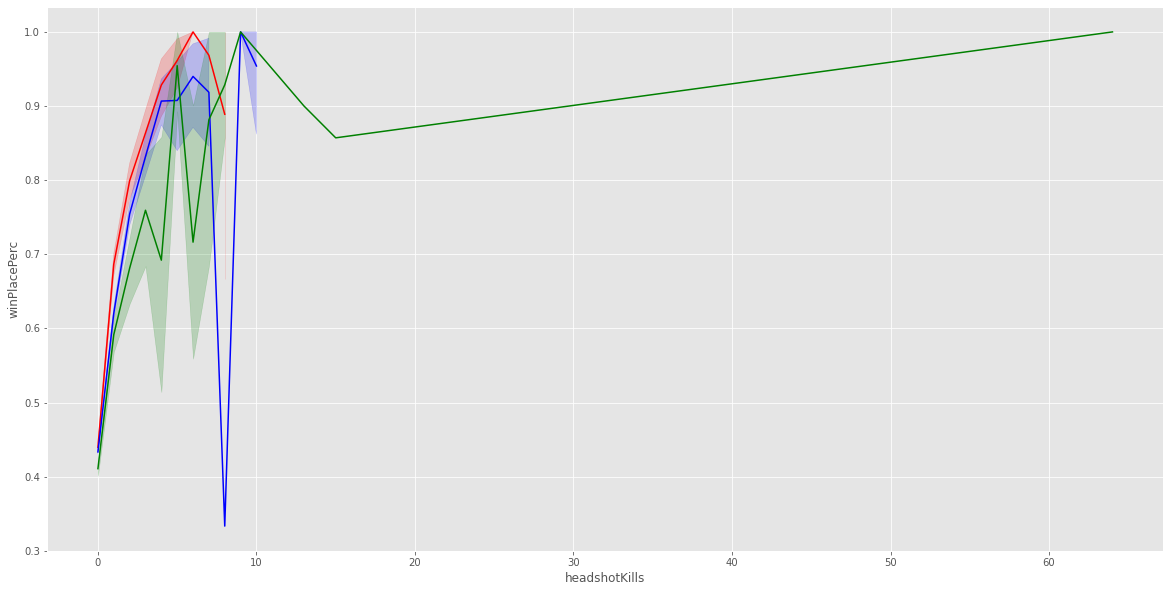

In [87]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='headshotKills',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='headshotKills',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='headshotKills',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

1. Here we can see that players who win more matches are playing duo modes and the headshot kill percentage is more too.
2. solo mode is average as compared to duo mode in getting more head shot kills and winning matches.
3. In squad mode players are not often getting more headshot kills and winning the game.

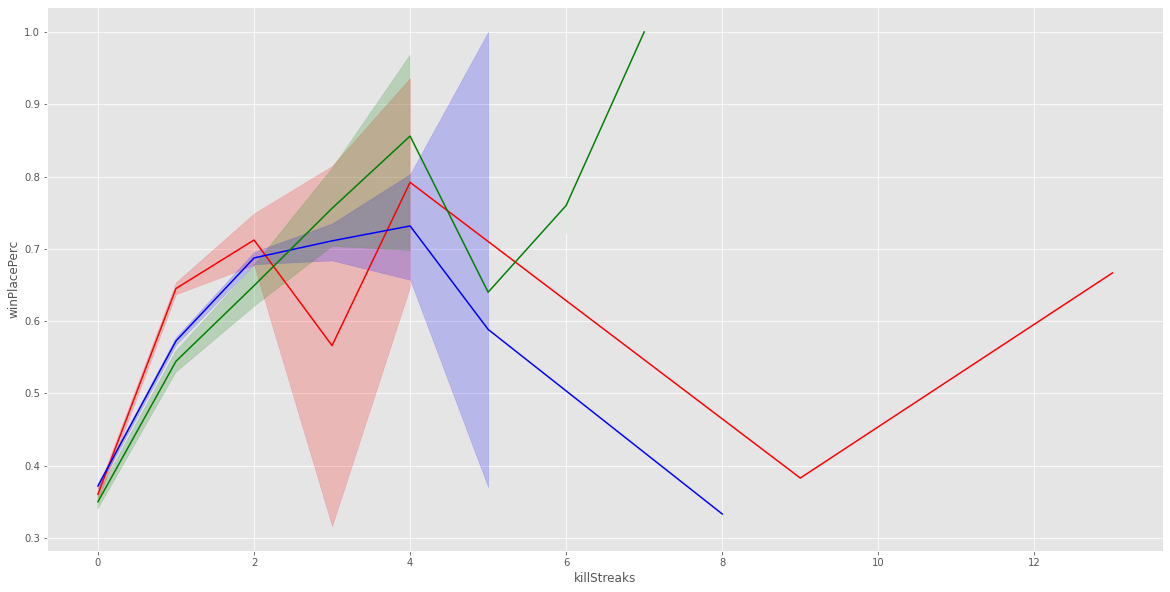

In [88]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='killStreaks',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='killStreaks',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='killStreaks',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

1. We can see players who are playing solo mode are able to get moderate kill streaks of around 5 and winning matches.
2. Here players playing in duo mode are able to get max kill streak of 4 and still not winning the game.
3. Players playin in squad mode are actually tend to get more kill streaks of around 8+ and winning percentage is also good.

# Checking the Correlation matrix to see which features are correlated more.

<AxesSubplot:>

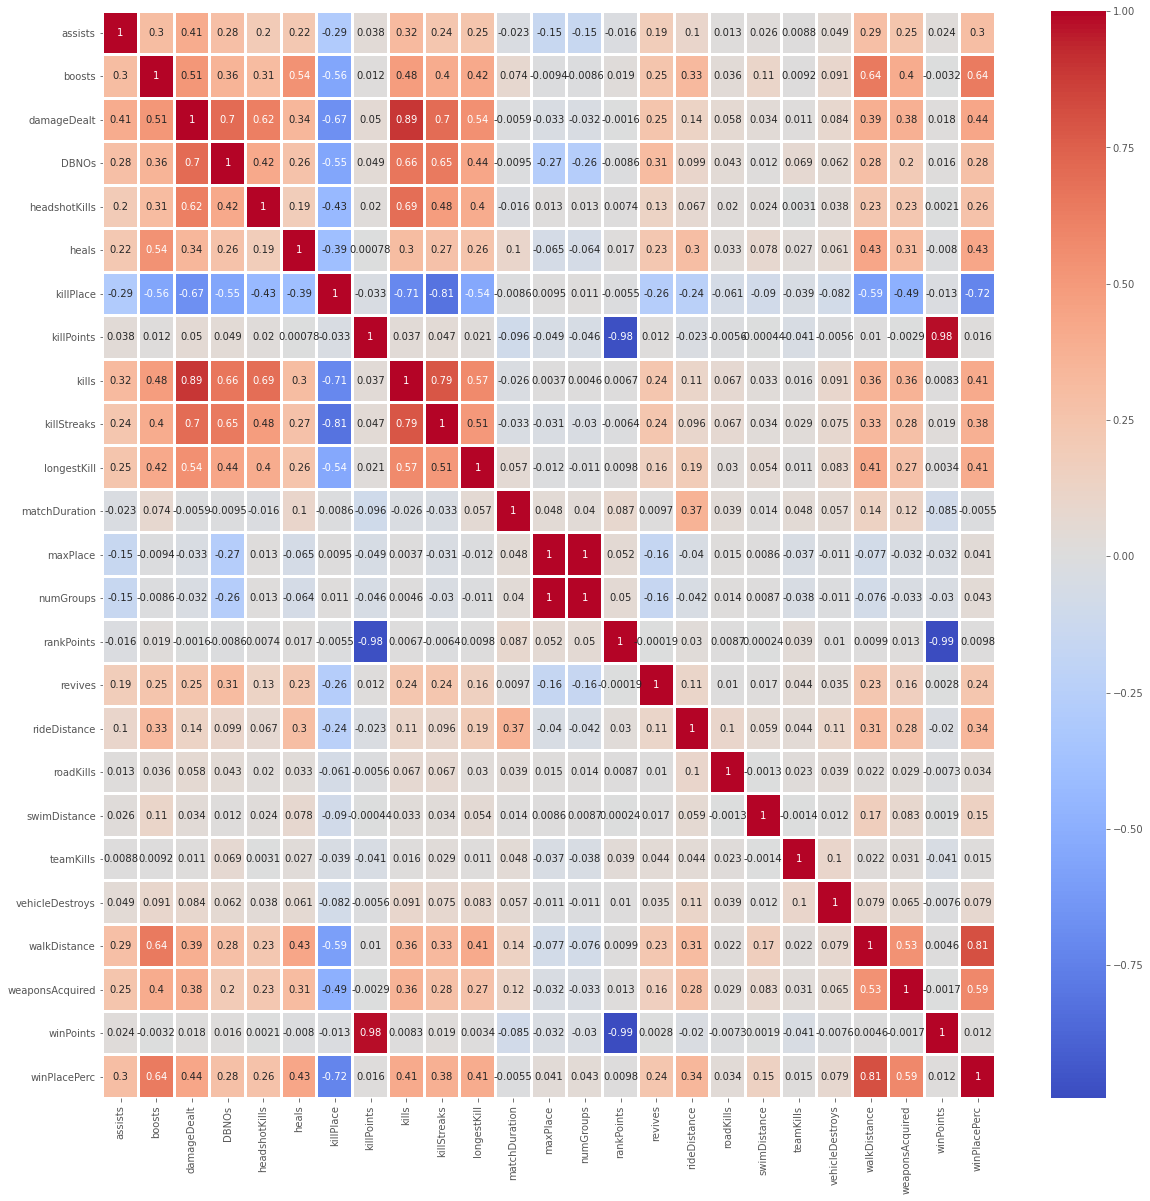

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot = True, cmap = "coolwarm",linewidths=2)

1. Here we can see the most correlated features are kill points with win points that is 98%.
2. Second most correlated features are kills with damage dealt which is 89%.
**Below printing the corr values and features.**

In [90]:
df_new.corr().sum()

assists            3.884782
boosts             6.350035
damageDealt        6.828973
DBNOs              5.096776
headshotKills      4.936230
heals              4.880023
killPlace         -6.564602
killPoints         1.018934
kills              6.731364
killStreaks        5.727310
longestKill        5.541515
matchDuration      1.896696
maxPlace           1.184884
numGroups          1.190075
rankPoints        -0.638379
revives            3.281697
rideDistance       3.814705
roadKills          1.631567
swimDistance       1.836288
teamKills          1.355413
vehicleDestroys    2.104763
walkDistance       5.972766
weaponsAcquired    5.030720
winPoints          0.852122
winPlacePerc       6.193955
dtype: float64

<AxesSubplot:xlabel='killPoints', ylabel='winPoints'>

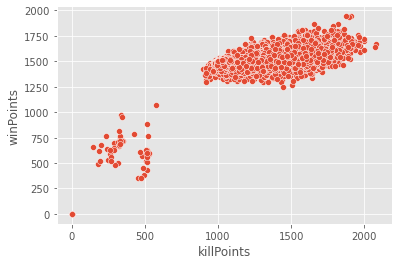

In [91]:
sns.scatterplot(df_new['killPoints'],df_new['winPoints'])

<AxesSubplot:xlabel='kills', ylabel='damageDealt'>

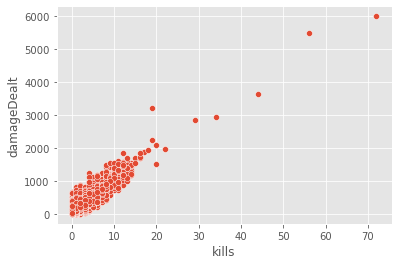

In [92]:
sns.scatterplot(df_new['kills'],df_new['damageDealt'])